import Data set

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
data = pd.read_csv(r"C:\Users\rudra\LMS\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.sample(10)

,Newspaper,daily,sunday
26,Rochester Democrat & Chronicle,133.239,262.048
30,St. Louis Post-Dispatch,391.286,585.681
6,Cincinnati Enquirer,198.832,348.744
18,New York Times,1209.225,1762.015
32,Tampa Tribune,321.626,408.343
4,Chicago Sun Times,537.780,559.093
24,Portland Oregonian,337.672,440.923
12,Los Angeles Daily News,185.736,202.614
2,Boston Herald,355.628,235.084
33,Washington Post,838.902,1165.567


In [5]:
data.shape

(34, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [7]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [8]:
data.sample(10)

,Newspaper,daily,sunday
16,New Orleans Times-Picayune,272.280,324.241
9,Hartford Courant,231.177,323.084
4,Chicago Sun Times,537.780,559.093
10,Houston Chronicle,449.755,620.752
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
15,Minneapolis Star Tribune,412.871,685.975
19,Newsday,825.512,960.308
8,Des Moines Register,206.204,344.522
14,Miami Herald,444.581,553.479


In [9]:
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


Correlation

In [11]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

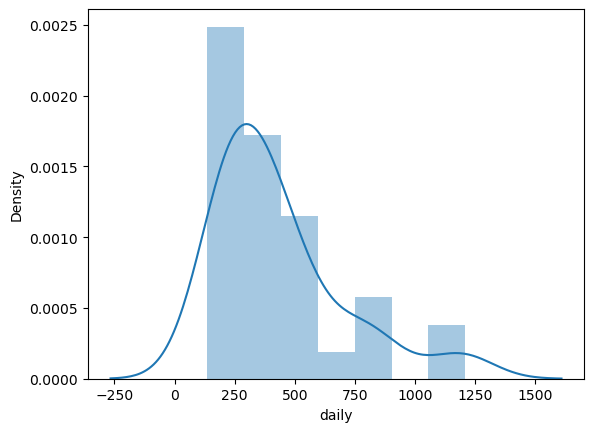

In [12]:
import seaborn as sns
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

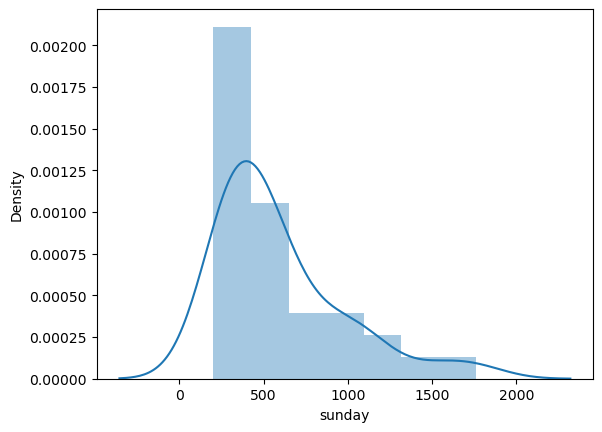

In [13]:

sns.distplot(data['sunday'])

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data=data).fit()

<Axes: xlabel='daily', ylabel='sunday'>

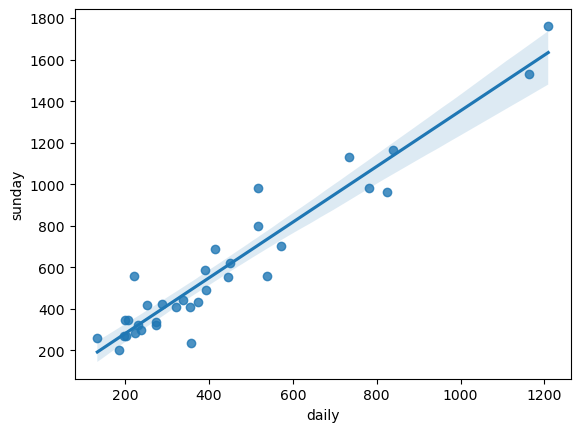

In [15]:
sns.regplot(x="daily",y="sunday",data=data)

<Axes: xlabel='daily', ylabel='sunday'>

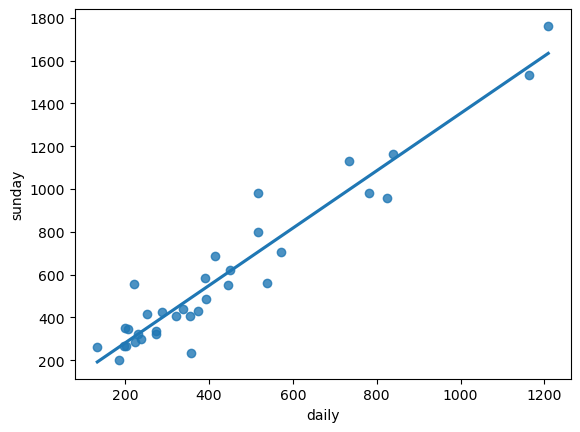

In [16]:
sns.regplot(x="daily",y="sunday",data=data,ci=None)

In [32]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [36]:
print(model.tvalues,"\n",model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [38]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

Predict for new data points

In [75]:
newdata=pd.Series([500,1300])

In [77]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [79]:
model.predict(data_pred)

0     683.693009
1    1755.464815
dtype: float64

In [81]:
newdata

0     500
1    1300
dtype: int64

In [83]:
data_pred

,daily
0,500
1,1300


In [85]:
683*0.09

61.47

In [87]:
683 +- 61.45


621.55

In [89]:
1085+-100

985

In [91]:
newdata=pd.Series([1000,3000])

In [93]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [95]:
model.predict(data_pred)


0    1353.550388
1    4032.979903
dtype: float64

In [97]:
newdata

0    1000
1    3000
dtype: int64

In [99]:
data_pred

,daily
0,1000
1,3000
